In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [ ]:
X,y=make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

In [ ]:
alphas=[0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L=Lasso(aplha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

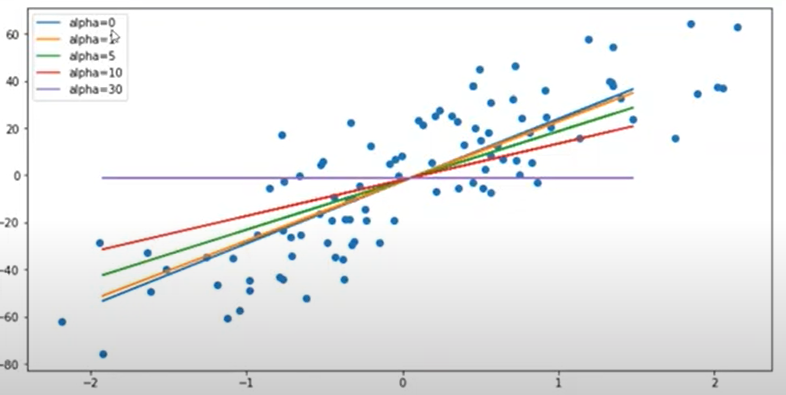

# Now we will be applyting Lasso on Polynomial Linear Regression

In [ ]:
m=100
x1=5 * np.random.rand(m,1) - 2
x2=0.7 * x1**2 - 2 * x1 +3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1,x2,alpha):
    model=Pipeline([('poly_feats',PolynomialFeatures(degree=16)),('lasso',Lasso(alpha=alpha))])
    
    model.fit(x1,x2)
    return model.predict(x1)
alphas=[0,0.1,1]
cs=['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds= get_preds_lasso(x1,x2,alpha)
    
    #Plot
    plt.legend()
    plt.show()

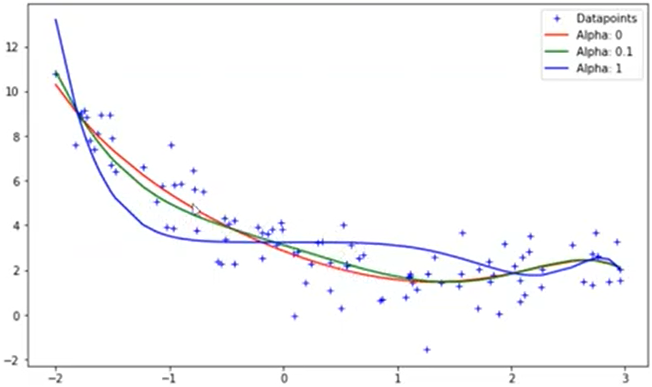

# How are coefficients related?

In [ ]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [ ]:
data=load_diabetes()

df=pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET']=data.target

df.head()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [ ]:
coefs=[]
r2_scores=[]

for i in [0,0.1,1,10]:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist()) #tolist() is converting array to list
    y_pred=reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

In [ ]:
coefs

In [ ]:
r2_scores

Text(0.5, 1.0, 'Alpha=10, r2_score=-0.01')

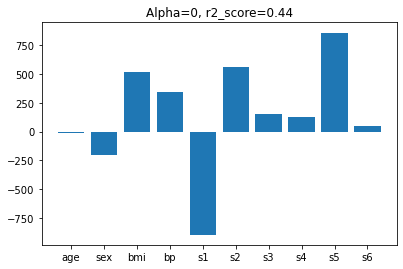

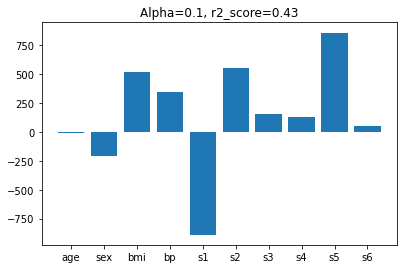

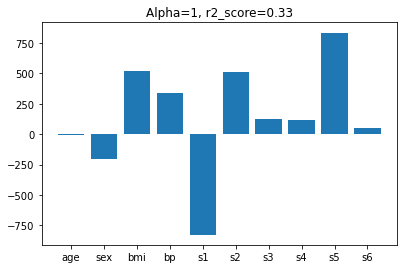

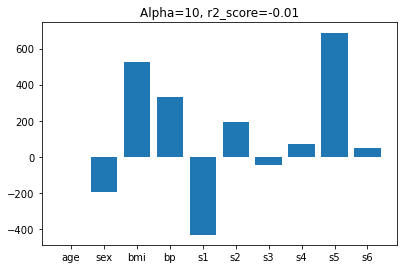

In [67]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha=0, r2_score={}'.format(round(r2_scores[0],2)))

plt.figure(figsize=(14,9))
plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha=0.1, r2_score={}'.format(round(r2_scores[1],2)))

plt.figure(figsize=(14,9))
plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha=1, r2_score={}'.format(round(r2_scores[2],2)))

plt.figure(figsize=(14,9))
plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha=10, r2_score={}'.format(round(r2_scores[3],2)))


# 2.Higher coefficient values are effected more

In [ ]:
alphas=[0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs=[]

for i in alphas:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [78]:
input_array=np.array(coefs) #converting list to array

coef_df=pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alphas #creating a new column in the DataFrame
coef_df.set_index('alpha') #making the alpha column as index



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.160885,-205.462260,516.684624,340.627341,-895.543596,561.214523,153.884780,126.734314,861.121395,52.419828
0.0001,-9.071288,-205.337332,516.780313,340.539730,-888.652320,555.952271,150.585260,125.453044,858.639860,52.379002
0.0010,-8.264924,-204.213177,517.641106,339.751339,-826.653342,508.609613,120.899583,113.924518,836.314382,52.011583
0.0100,-1.361404,-192.944226,526.348511,332.649058,-430.205495,191.277876,-44.048113,68.990747,688.384976,47.939528
0.1000,0.000000,-113.976046,526.737112,292.635423,-82.691928,-0.000000,-152.691332,0.000000,551.077200,7.169852
1.0000,0.000000,0.000000,363.882636,27.278420,0.000000,0.000000,-0.000000,0.000000,336.135971,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [ ]:
When we increase the value of alpha to a very high value, many of the coefficients become zero

In [ ]:
input_array=np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()
    

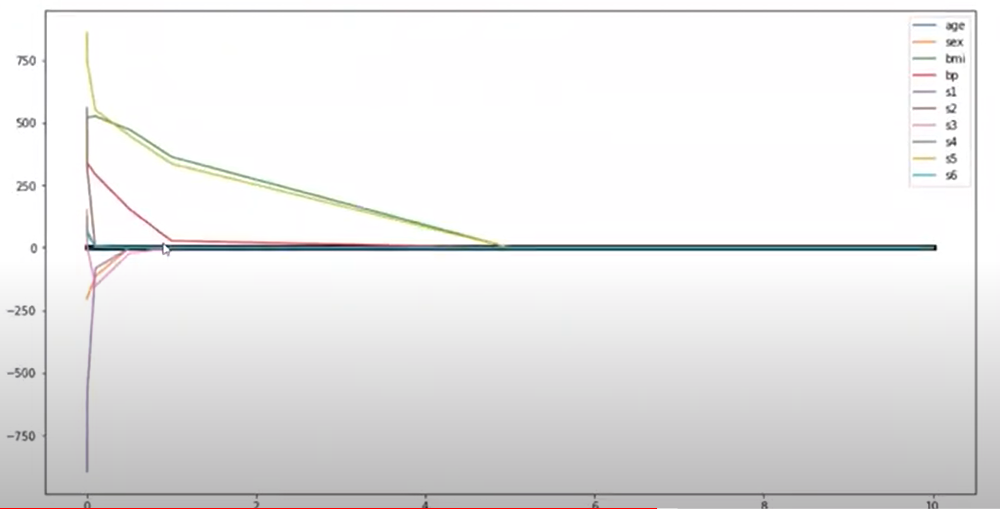

# Impact on Bias and Variance

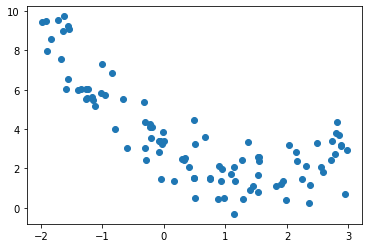

In [66]:
m=100
X=5 * np.random.rand(m,1) - 2
y=0.7 * X**2 - 2 * X + 3 + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

# Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


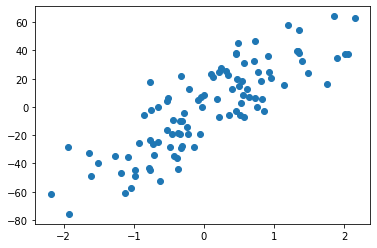

In [70]:
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [71]:
def cal_loss(m,aplha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [72]:
def predict(m):
    return m*X-2.29

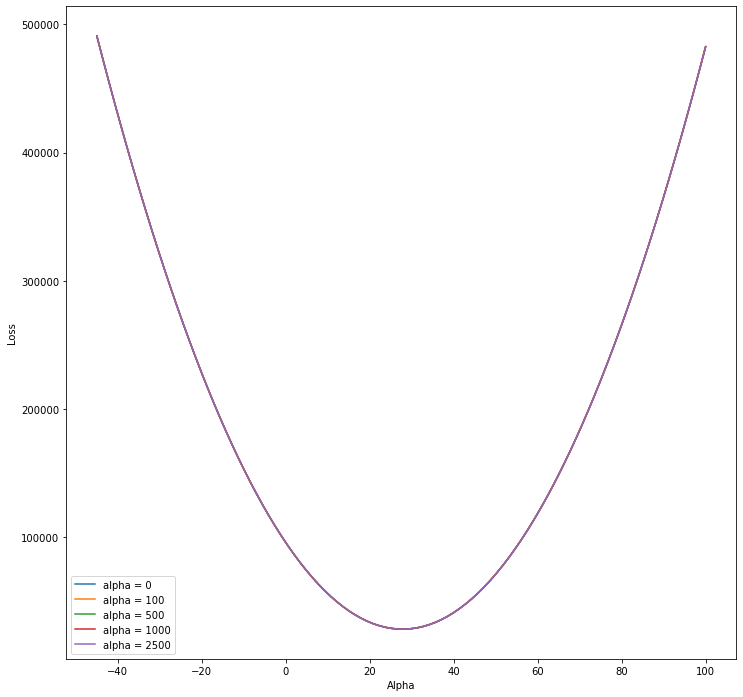

In [77]:
m=np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500]:
    loss=[]
    for i in range(m.shape[0]):
        loss_i=cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

In [74]:
m=np.linspace(-45,100,100)
m

array([-45.        , -43.53535354, -42.07070707, -40.60606061,
       -39.14141414, -37.67676768, -36.21212121, -34.74747475,
       -33.28282828, -31.81818182, -30.35353535, -28.88888889,
       -27.42424242, -25.95959596, -24.49494949, -23.03030303,
       -21.56565657, -20.1010101 , -18.63636364, -17.17171717,
       -15.70707071, -14.24242424, -12.77777778, -11.31313131,
        -9.84848485,  -8.38383838,  -6.91919192,  -5.45454545,
        -3.98989899,  -2.52525253,  -1.06060606,   0.4040404 ,
         1.86868687,   3.33333333,   4.7979798 ,   6.26262626,
         7.72727273,   9.19191919,  10.65656566,  12.12121212,
        13.58585859,  15.05050505,  16.51515152,  17.97979798,
        19.44444444,  20.90909091,  22.37373737,  23.83838384,
        25.3030303 ,  26.76767677,  28.23232323,  29.6969697 ,
        31.16161616,  32.62626263,  34.09090909,  35.55555556,
        37.02020202,  38.48484848,  39.94949495,  41.41414141,
        42.87878788,  44.34343434,  45.80808081,  47.27

In [75]:
m.shape

(100,)